Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [43]:
import pandas as pd
import sqlite3
from sqlite3 import Error
import numpy as np
import matplotlib.pyplot as plt

citybikes_df = pd.read_csv('citybikes.csv')
yelp_df = pd.read_csv('yelp.csv')
foursquare_df = pd.read_csv('foursquare.csv')


- The city bikes table has a one to many relation per entry. To JOIN this, it will either create too many duplicates,
    or if a inner join is done, too many values can be lost.
- Hence, decided not to go forward with a traditional join on the dataframes.

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

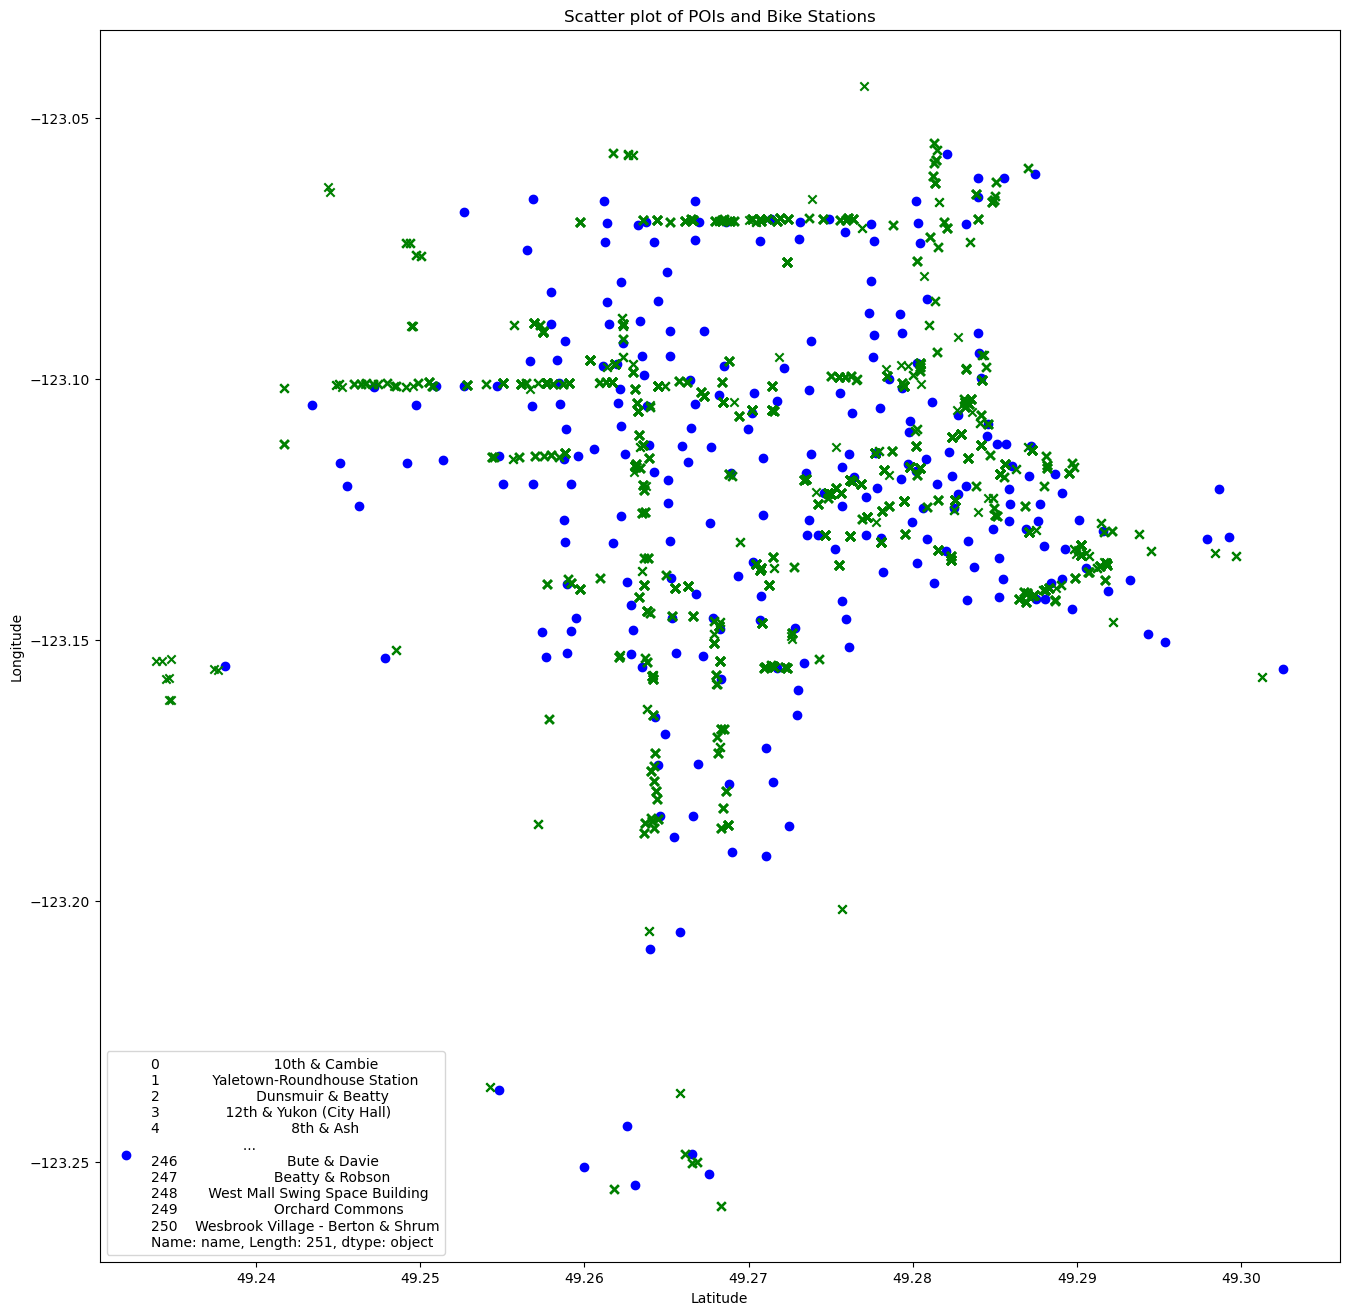

In [44]:
lat = []
lon = []

counter = 0

for i, row in citybikes_df.iterrows():
    df_POI = yelp_df[yelp_df['key'] == counter]
    citybikes_df['POI'] = df_POI.to_json()
    lat = lat + df_POI['latitude'].to_list()
    lon = lon + df_POI['longitude'].to_list()
    counter+=1 
           

plt.figure(figsize=(16,16))
plt.scatter(citybikes_df['latitude'],citybikes_df['longitude'], color="Blue", marker="o", label=citybikes_df['name'])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Scatter plot of POIs and Bike Stations")

plt.scatter(lat,lon, color="green", marker="x")
plt.legend()
plt.show()

In [45]:
citybikes_df['rating_avg_bar'] = ""
citybikes_df['count_bar'] = ""
citybikes_df['rating_avg_rest'] = ""
citybikes_df['count_rest'] = ""

# adding new columns to the city bikes df which contain the aggregate values such as count and reviews of bars and restaurants
# for better visualization and modeling

for i,row in citybikes_df.iterrows():
    df_POI1 = yelp_df[yelp_df['key'] == i]
    new_data_df = pd.DataFrame(df_POI1)
    new_data_df["categories"] = ""
    
    for i1, row1 in df_POI1.iterrows():
        if any(x in row1['categories'] for x in ['bar', 'lounge', 'pub']):
            new_data_df.loc[i1,'categories'] = "bar"
        else:
            new_data_df.loc[i1,'categories'] = "restaurants"
            
    grouped_df = new_data_df.groupby('categories')['rating'].agg(['mean', 'count'])
    
    for i2,row2 in grouped_df.iterrows():
        if i2 == "bar":
            citybikes_df.loc[i, 'rating_avg_bar'] = row2['mean']
            citybikes_df.loc[i, 'count_bar'] = row2['count']
        else:
            citybikes_df.loc[i, 'rating_avg_rest'] =row2['mean']
            citybikes_df.loc[i, 'count_rest'] = row2['count']

citybikes_df
# saving the new citybikes DF as a csv
citybikes_df.to_csv('citybikes_joined.csv', index=False)

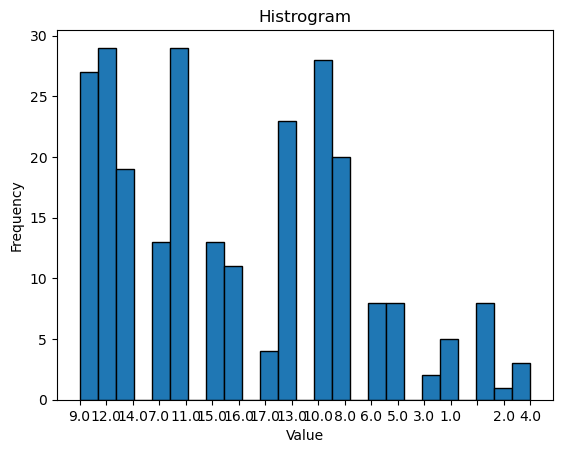

In [46]:
data = citybikes_df['count_bar'].to_list()

plt.hist(data, bins=25, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histrogram')
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [47]:
def create_connection(db_file):
    conn = None;
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    return conn

In [48]:
def upload_dataframe(citybikes_df, city_bikes, conn):
    citybikes_df.to_sql(city_bikes, conn, if_exists='replace', index=False)
    
conn = create_connection('C:\\Users\\apoor\\OneDrive\\Documents\\Data Analytics LHL\\LHL-PythonProject\\Database\\city_bikes.db')
    
upload_dataframe(citybikes_df, 'city_bikes', conn)

2.6.0


In [49]:
def upload_dataframe(foursquare_df, foursquare, conn):
    foursquare_df.to_sql(foursquare, conn, if_exists='replace', index=False)
    
conn = create_connection('C:\\Users\\apoor\\OneDrive\\Documents\\Data Analytics LHL\\LHL-PythonProject\\Database\\foursquare.db')
    
upload_dataframe(foursquare_df, 'foursquare', conn)

2.6.0


In [50]:
def upload_dataframe(yelp_df, yelp, conn):
    yelp_df.to_sql(yelp, conn, if_exists='replace', index=False)
    
conn = create_connection('C:\\Users\\apoor\\OneDrive\\Documents\\Data Analytics LHL\\LHL-PythonProject\\Database\\yelp.db')
    
upload_dataframe(yelp_df, 'yelp', conn)

2.6.0
